In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

Things to look into:
 - top venues
 - top cover song by venue
 - percentage of cover to total per city (pie chart)
 - percentage of cover to total per venue 
 - top 10 covered songs overall
 - top 10 covered artists overall

In [2]:
data={'Cities':['New York', 'Nashville', 'Austin', 'Los Angeles', 'Chicago', 
           'Las Vegas', 'Denver', 'San Fransicso', 'Seattle', 'Portland'], 
 'States': ['NY', 'TN', 'TX', 'CA', 'IL', 'NV', 'CO', 'CA', 'WA', 'OR'], 
      'Number of Setlists':[8155, 2225, 4369, 8021, 5683, 4327, 3063, 2565, 3186, 2362]}


df=pd.DataFrame(data)

df['Number of Requests']=df['Number of Setlists']/20
df

,Cities,States,Number of Setlists,Number of Requests
0,New York,NY,8155,407.75
1,Nashville,TN,2225,111.25
2,Austin,TX,4369,218.45
3,Los Angeles,CA,8021,401.05
4,Chicago,IL,5683,284.15
5,Las Vegas,NV,4327,216.35
6,Denver,CO,3063,153.15
7,San Fransicso,CA,2565,128.25
8,Seattle,WA,3186,159.30
9,Portland,OR,2362,118.10


## Sent to Rob: New York, Los Angeles, Chicago, Austin (around 1300 calls)

## I did Seattle, Portland, Nashville

## Still need Las Vegas, Denver, San Fransisco


In [3]:
portland=pd.read_excel('../Data/music_matters_portland.xlsx')

In [22]:
portland['city'].value_counts()

Portland        11641
Troutdale         665
Happy Valley      296
Forest Grove      131
Beaverton          37
West Linn          16
Name: city, dtype: int64

In [34]:
portland = portland[portland['city']=='Portland']

In [35]:
portland['city'].value_counts()

Portland    11641
Name: city, dtype: int64

In [36]:
seattle=pd.read_excel('../Data/music_matters_seattle.xlsx')

In [37]:
seattle['city'].value_counts()

Seattle        14341
Tacoma           643
Redmond          587
Auburn           408
Woodinville      346
Everett          229
Edmonds           92
Kent              53
Lynnwood          29
Bellevue          22
Tukwila           16
Shoreline         10
Renton             5
Vashon             5
Des Moines         4
Federal Way        1
Name: city, dtype: int64

In [38]:
seattle = seattle[seattle['city']=='Seattle']

In [5]:
nashville=pd.read_excel('../Data/music_matters_nashville.xlsx')

In [24]:
nashville['city'].value_counts()

Nashville       13385
Franklin          562
Murfreesboro      137
Madison           126
Columbia           65
Clarksville        33
Smyrna             14
Name: city, dtype: int64

In [39]:
nashville = nashville[nashville['city']=='Nashville']

In [6]:
new_york=pd.read_excel('../Data/music_matters_new_york.xlsx')

In [25]:
new_york['city'].value_counts()

New York           24561
Brooklyn           13482
Queens              1382
Elmont               564
Ridgewood            464
Staten Island        176
Uniondale             77
Yonkers               42
Elmsford              21
The Bronx             18
Randalls Island        4
Name: city, dtype: int64

In [40]:
new_york = new_york[new_york['city']=='New York']

In [7]:
los_angeles =pd.read_excel('../Data/music_matters_los_angeles.xlsx')

In [26]:
los_angeles['city'].value_counts()

Los Angeles            26283
Anaheim                 3592
West Hollywood          3338
Inglewood               3299
Santa Ana               1972
Pomona                  1588
Pasadena                1480
Long Beach              1183
Garden Grove             598
Redondo Beach            468
Beverly Hills            253
San Fernando             252
Burbank                  242
Ontario                  238
Agoura Hills             237
Santa Monica             232
Venice                   216
Thousand Oaks            199
San Pedro                195
Santa Clarita            179
La Mirada                 80
East Los Angeles          76
Huntington Beach          75
Glendale                  75
Montclair                 66
Altadena                  47
Cerritos                  47
Culver City               45
Malibu                    43
Fullerton                 37
Seal Beach                37
Norco                     35
Westlake Village          33
Northridge                33
Fountain Valle

In [41]:
los_angeles = los_angeles[los_angeles['city']=='Los Angeles']

In [8]:
austin =pd.read_excel('../Data/music_matters_austin.xlsx')

In [27]:
austin['city'].value_counts()

Austin              18029
Cedar Park            274
Round Rock            122
Spicewood              66
Buda                   51
Hutto                  48
Dripping Springs       43
Bee Cave               36
Kyle                   26
Coupland               25
Marble Falls           21
Georgetown             15
Wimberley              14
Del Valle              12
Pflugerville           10
Driftwood               3
Name: city, dtype: int64

In [42]:
austin = austin[austin['city']=='Austin']

In [9]:
chicago =pd.read_excel('../Data/music_matters_chicago.xlsx')

In [28]:
chicago['city'].value_counts()

Chicago               26527
Joliet                 1361
Evanston                814
Tinley Park             804
Des Plaines             798
Aurora                  598
Highland Park           582
Rosemont                519
Berwyn                  458
Bridgeview              228
West Chicago            111
Oak Park                110
Hoffman Estates          92
Lombard                  91
Highwood                 83
Wheaton                  78
Palatine                 70
Skokie                   68
Elmhurst                 61
Arlington Heights        60
Naperville               44
Homewood                 39
Schaumburg               33
Roselle                  30
Elk Grove Village        30
Winnetka                 28
Wheeling                 26
Rolling Meadows          26
River Grove              25
Romeoville               18
Addison                  17
Lemont                   16
Libertyville             15
South Barrington         15
Vernon Hills             15
West Dundee         

In [43]:
chicago = chicago[chicago['city']=='Chicago']

In [10]:
denver =pd.read_excel('../Data/music_matters_denver.xlsx')

In [29]:
denver['city'].value_counts()

Denver               12219
Morrison              3204
Englewood              850
Greenwood Village      678
Arvada                 175
Parker                  95
Broomfield              89
Littleton               78
Commerce City           55
Highlands Ranch         45
Thornton                23
Aurora                  23
Castle Rock             16
Golden                  10
Evergreen                9
Name: city, dtype: int64

In [44]:
denver = denver[denver['city']=='Denver']

In [11]:
las_vegas =pd.read_excel('../Data/music_matters_las_vegas.xlsx')

In [30]:
las_vegas['city'].value_counts()

Las Vegas          6274
Henderson           108
North Las Vegas      36
Name: city, dtype: int64

In [45]:
las_vegas = las_vegas[las_vegas['city']=='Las Vegas']

In [12]:
san_francisco =pd.read_excel('../Data/music_matters_san_francisco.xlsx')

In [31]:
san_francisco['city'].value_counts()

San Francisco    14378
Novato             462
Menlo Park         461
Mill Valley        358
Pacifica           111
Nicasio             68
Redwood City        53
San Mateo           43
San Rafael          38
Half Moon Bay       36
Kentfield           10
Bolinas              1
Name: city, dtype: int64

In [46]:
san_francisco = san_francisco[san_francisco['city']=='San Francisco']

In [47]:
concat = pd.concat([new_york, nashville, seattle, portland, los_angeles, chicago, austin, denver, las_vegas, san_francisco], ignore_index=True)

In [48]:
concat

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,NY,40.714269,-74.005973,Did I Make You Up?,original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,NY,40.714269,-74.005973,Brighton,original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Death by Rock and Roll,original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Since You're Gone,original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Only Love Can Save Me Now,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167633,2b8b50be,g23f30c43,2022-01-01 00:00:00,2022-07-21T06:22:01.720+0000,Monsieur PerinÃ©,Miner Auditorium,5bd4e300,San Francisco,California,CA,37.775000,-122.419000,Encanto tropical,original
167634,2b8b50be,g23f30c43,2022-01-01 00:00:00,2022-07-21T06:22:01.720+0000,Monsieur PerinÃ©,Miner Auditorium,5bd4e300,San Francisco,California,CA,37.775000,-122.419000,Mundo paralelo,original
167635,2b8b50be,g23f30c43,2022-01-01 00:00:00,2022-07-21T06:22:01.720+0000,Monsieur PerinÃ©,Miner Auditorium,5bd4e300,San Francisco,California,CA,37.775000,-122.419000,Tarde,original
167636,2b8b50be,g23f30c43,2022-01-01 00:00:00,2022-07-21T06:22:01.720+0000,Monsieur PerinÃ©,Miner Auditorium,5bd4e300,San Francisco,California,CA,37.775000,-122.419000,Ton silence,original


In [49]:
concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')

In [50]:
concat['state'].value_counts()

California    40661
Illinois      26527
New York      24561
Texas         18029
Washington    14341
Tennessee     13385
Colorado      12219
Oregon        11641
Nevada         6274
Name: state, dtype: int64

<AxesSubplot:>

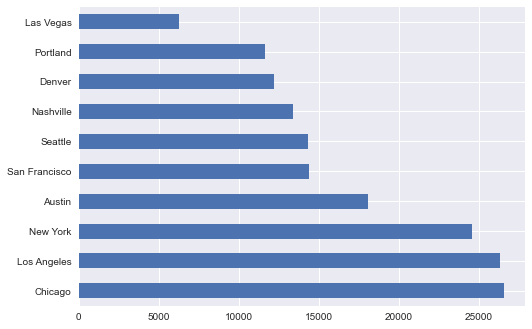

In [53]:
concat['city'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='barh')

Text(0.5, 1.0, 'Covers VS Originals')

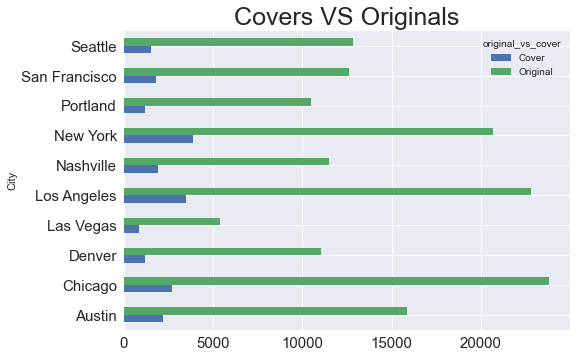

In [96]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)
# plt.tight_layout()

In [55]:
top_10_cities = concat.groupby('city').count()
top_10_cities

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover
city,,,,,,,,,,,,,,
Austin,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,17822,18029,18029
Chicago,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26349,26527,26527
Denver,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12141,12219,12219
Las Vegas,6274,6274,6274,6274,6274,6274,6274,6274,6274,6274,6274,6246,6274,6274
Los Angeles,26283,26283,26283,26283,26283,26283,26283,26283,26283,26283,26283,26031,26283,26283
Nashville,13385,13385,13385,13385,13385,13385,13385,13385,13385,13385,13385,13282,13385,13385
New York,24561,24561,24561,24561,24561,24561,24561,24561,24561,24561,24561,24388,24561,24561
Portland,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641,11641,11502,11641,11641
San Francisco,14378,14378,14378,14378,14378,14378,14378,14378,14378,14378,14378,14243,14378,14378


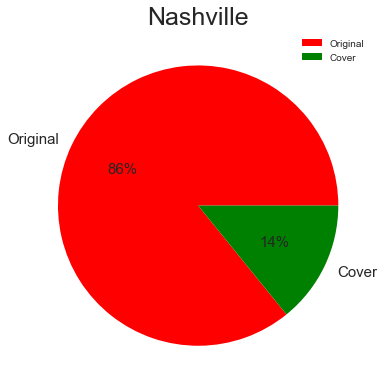

In [87]:
nashville = concat[concat['city']=='Nashville']

nashville['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Nashville',fontsize=25)
plt.tight_layout()

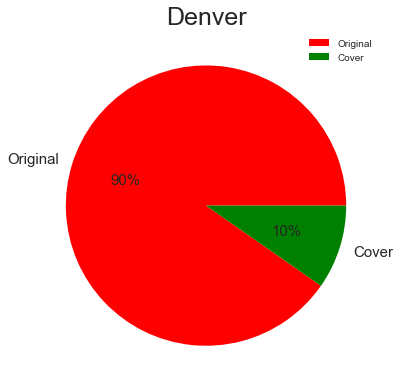

In [86]:
denver = concat[concat['city']=='Denver']

denver['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Denver',fontsize=25)
plt.tight_layout()

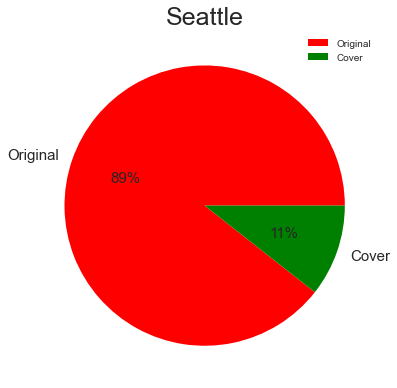

In [85]:
seattle = concat[concat['city']=='Seattle']

seattle['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Seattle',fontsize=25)
plt.tight_layout()

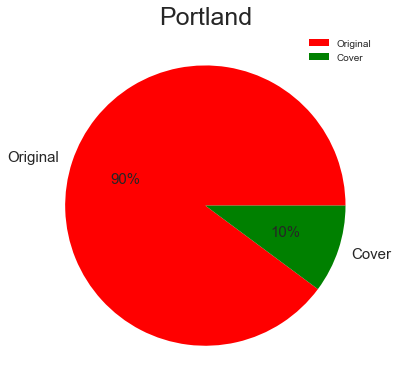

In [84]:
portland = concat[concat['city']=='Portland']

portland['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Portland',fontsize=25)
plt.tight_layout()

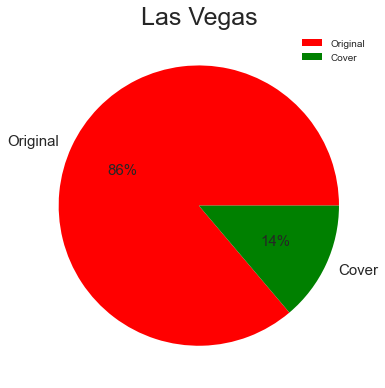

In [83]:
las_vegas = concat[concat['city']=='Las Vegas']

las_vegas['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Las Vegas',fontsize=25)
plt.tight_layout()

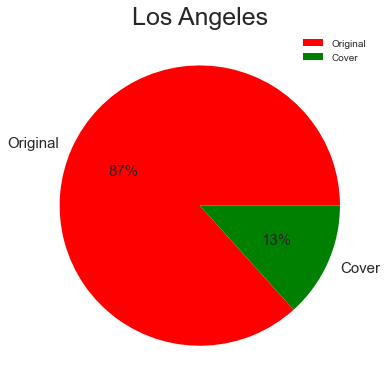

In [82]:
los_angeles = concat[concat['city']=='Los Angeles']

los_angeles['original_vs_cover'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Los Angeles',fontsize=25)
plt.tight_layout()

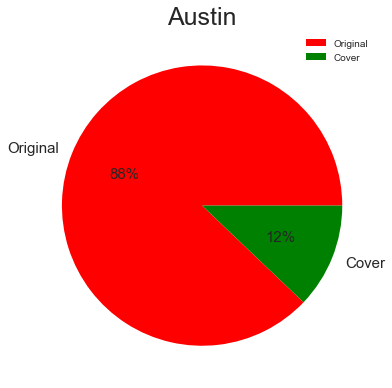

In [81]:
austin = concat[concat['city']=='Austin']

austin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Austin',fontsize=25)
plt.tight_layout()

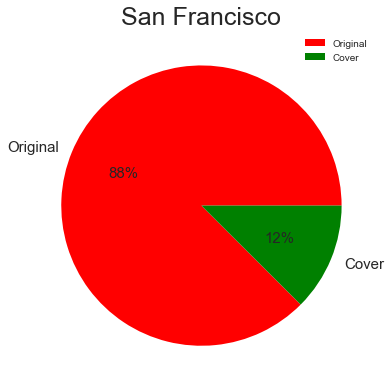

In [80]:
san_francisco = concat[concat['city']=='San Francisco']

san_francisco['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('San Francisco',fontsize=25)
plt.tight_layout()

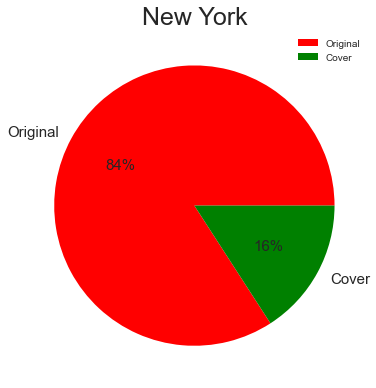

In [79]:
new_york = concat[concat['city']=='New York']

new_york['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('New York',fontsize=25)
plt.tight_layout()



In [97]:
originals = concat[concat['original_vs_cover']=='Original']
originals.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,NY,40.714269,-74.005973,Did I Make You Up?,original,Original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,NY,40.714269,-74.005973,Brighton,original,Original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Since You're Gone,original,Original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Only Love Can Save Me Now,original,Original


In [98]:
covers = concat[concat['original_vs_cover']=='Cover']
covers.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,stateCode,lat_coords,long_coords,song,cover,original_vs_cover
5,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,Loud Love,Soundgarden,Cover
19,43bcb7f3,g4be2535e,12-12-2022,2022-12-13T04:37:58.131+0000,Nick Perri & the Underground Thieves,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,"My My, Hey Hey (Out of the Blue)",Neil Young & Crazy Horse,Cover
26,7bbf429c,g5be25364,11-12-2022,2022-12-13T04:36:40.039+0000,Nick Perri & the Underground Thieves,Bowery Ballroom,33d61cdd,New York,New York,NY,40.714269,-74.005973,"My My, Hey Hey (Out of the Blue)",Neil Young & Crazy Horse,Cover
47,3bbcb8ac,g73e262f1,11-12-2022,2022-12-12T14:52:50.396+0000,Bad Omens,Irving Plaza,4bd61f3e,New York,New York,NY,40.714269,-74.005973,Sympathy,Too Close to Touch,Cover
69,2bbcb8a6,g3be2685c,11-12-2022,2022-12-12T01:45:08.340+0000,Make Them Suffer,Irving Plaza,4bd61f3e,New York,New York,NY,40.714269,-74.005973,Sandstorm,Darude,Cover


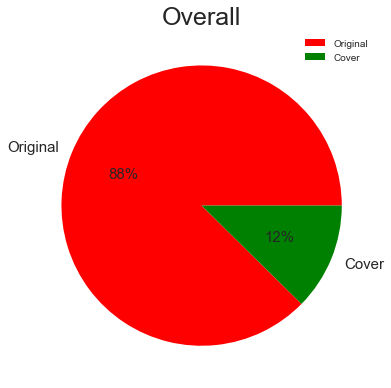

In [102]:
concat['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Overall',fontsize=25)
plt.tight_layout()
                        

Text(0.5, 1.0, 'Top 10 Covered Artists')

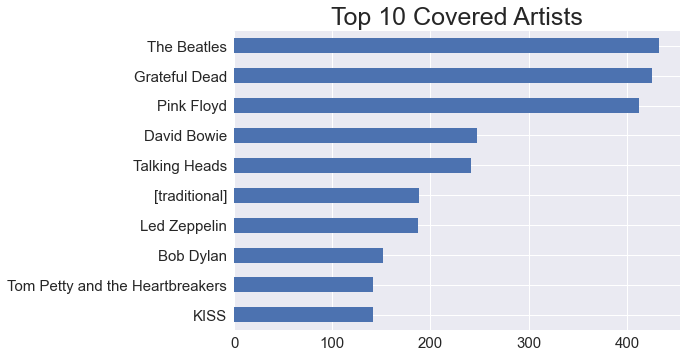

In [108]:
covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

plt.title('Top 10 Covered Artists',fontsize=25)

Text(0.5, 1.0, 'Top 10 Covered Songs')

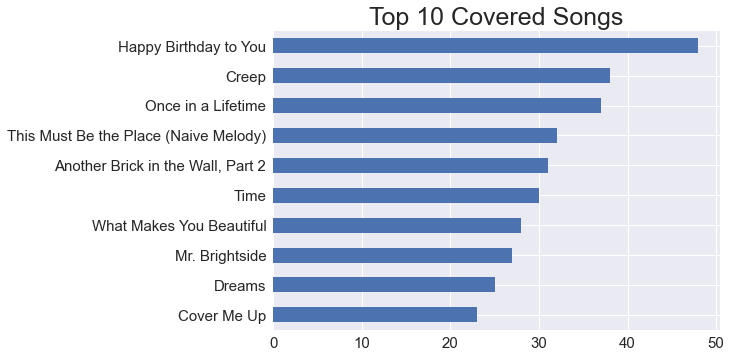

In [106]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

plt.title('Top 10 Covered Songs',fontsize=25)